In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import warnings
import plotly.express as px
px_template = "simple_white"

%matplotlib inline

In [4]:
data = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data.shape

(70692, 22)

In [6]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 70692 rows and 22 columns.


In [7]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


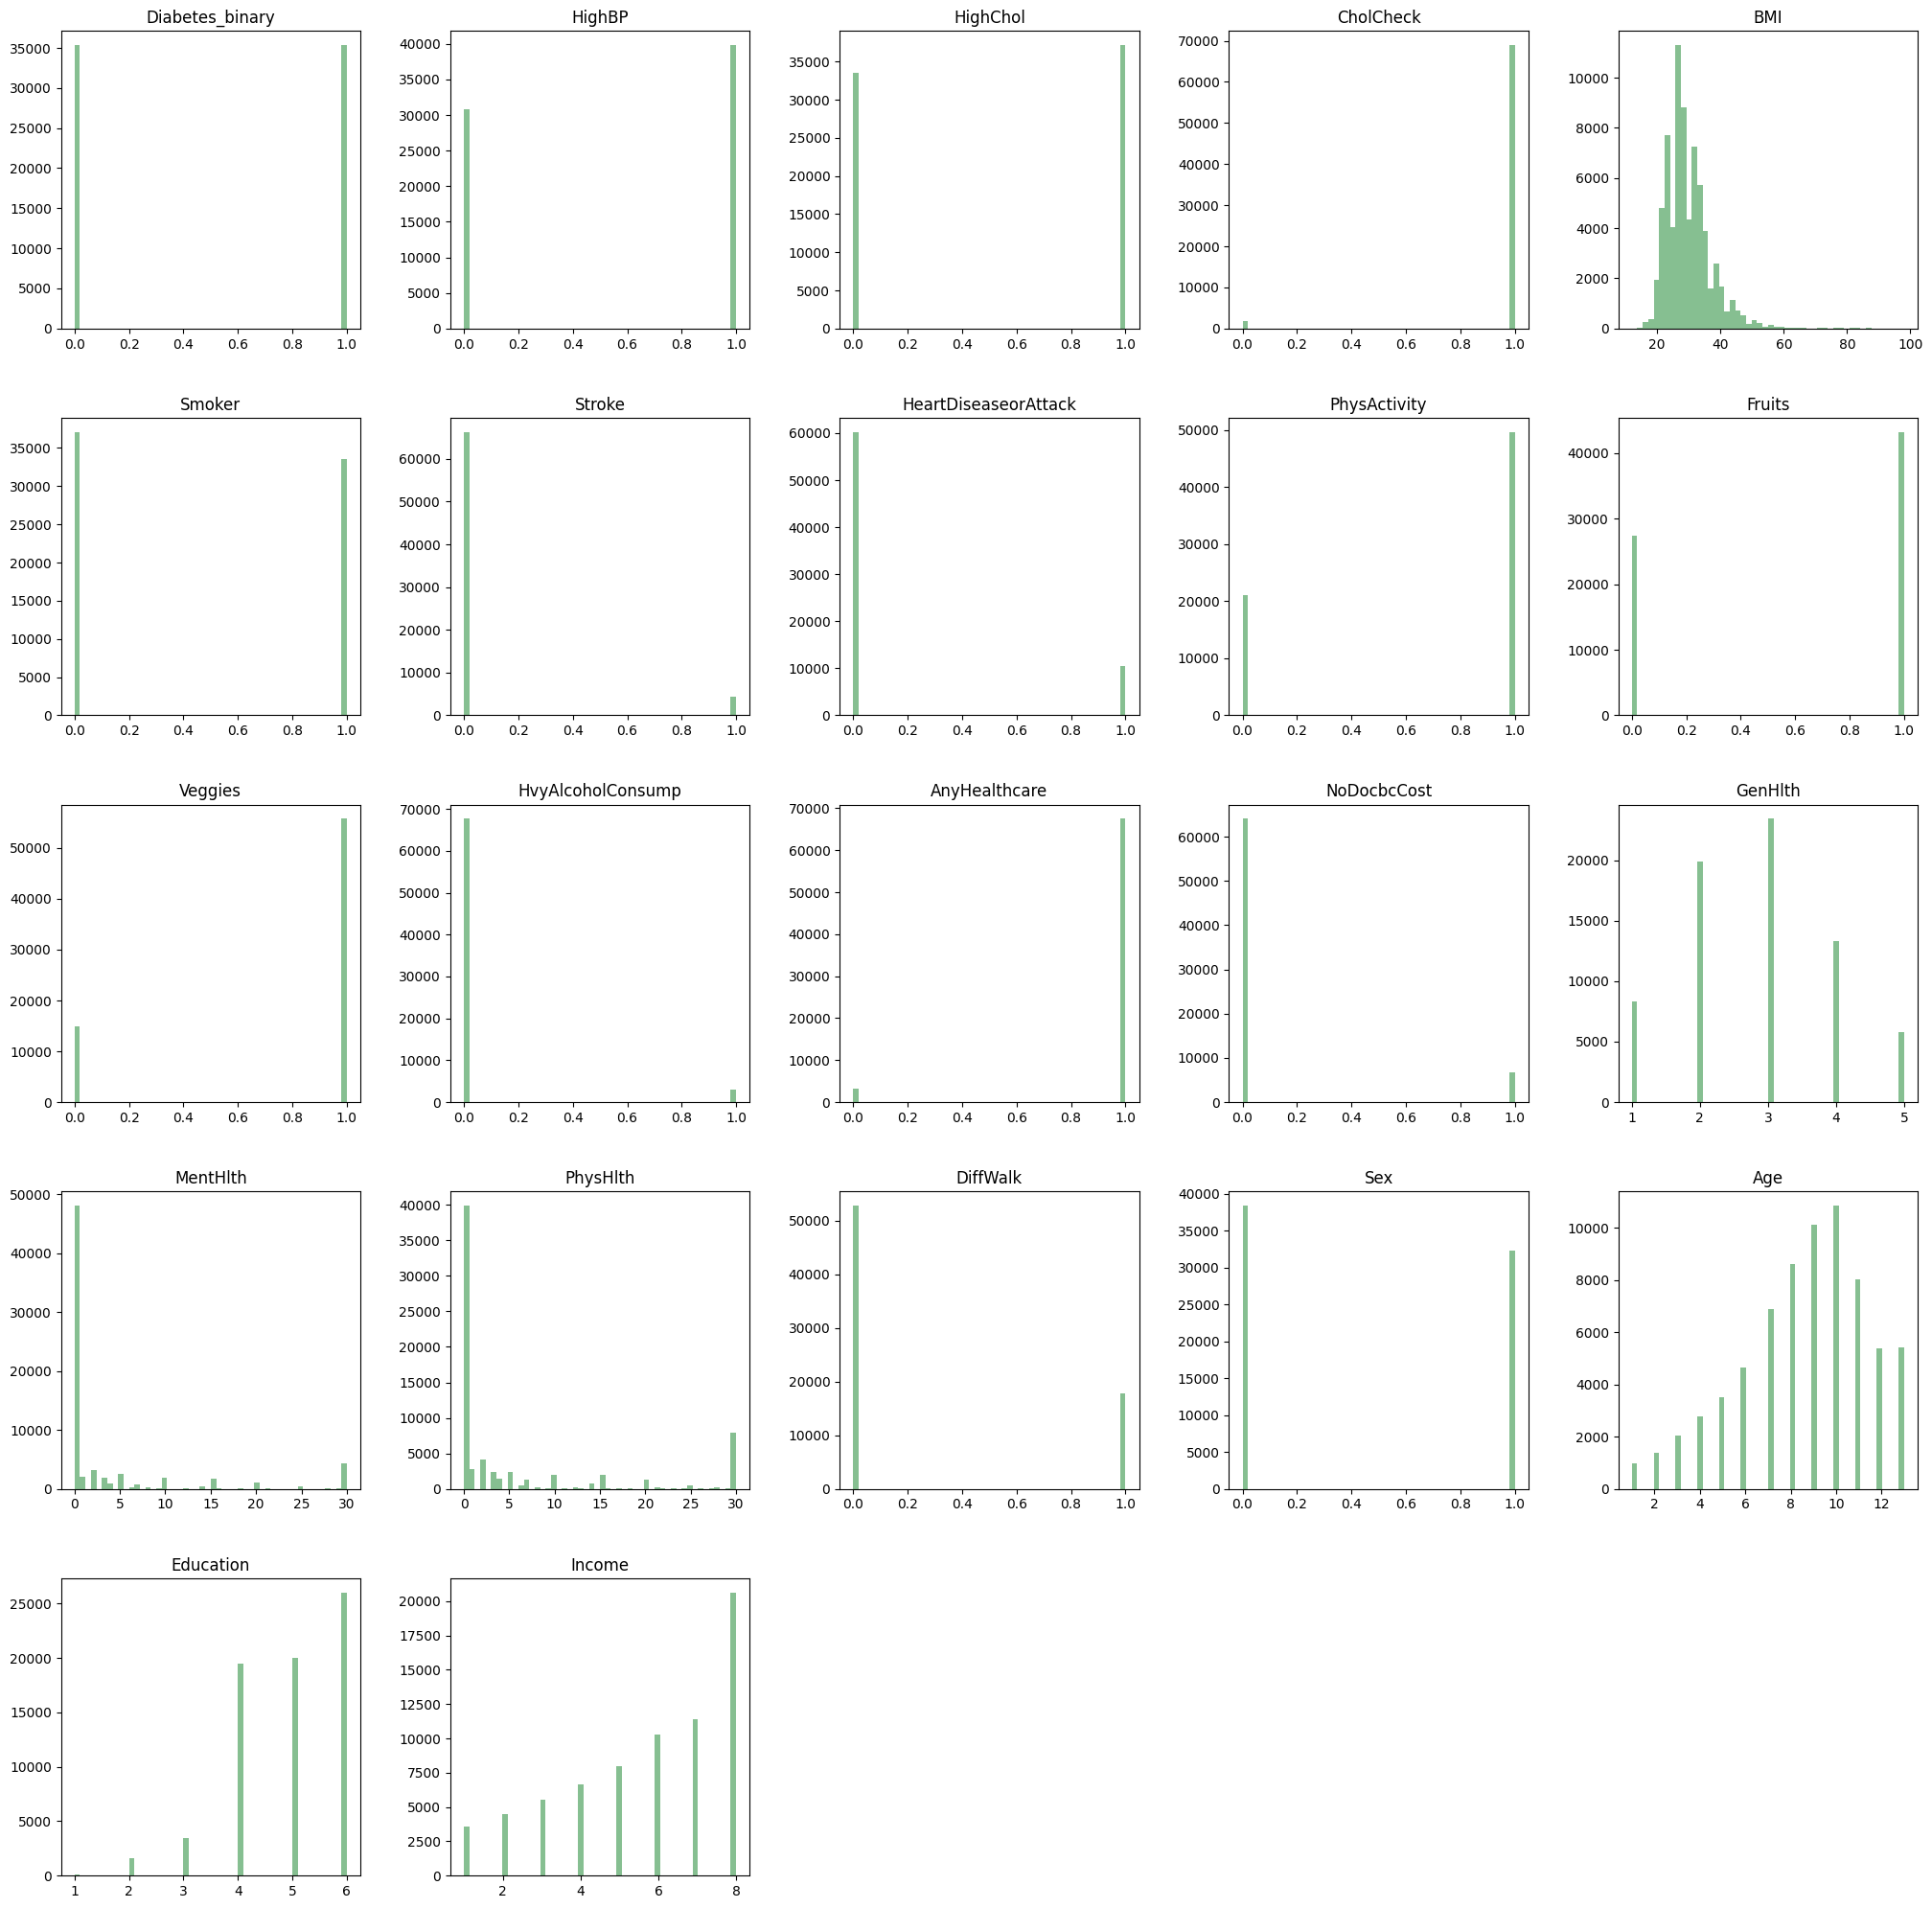

In [8]:
ax = data.hist(bins=50, grid=False, figsize=(25,25), color='#86bf91')

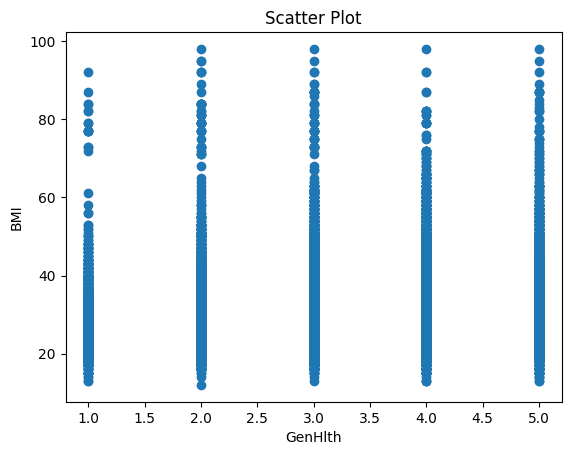

In [9]:
plt.scatter(data['GenHlth'], data['BMI'])

# Adding titleto the plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('GenHlth')
plt.ylabel('BMI')
plt.show()

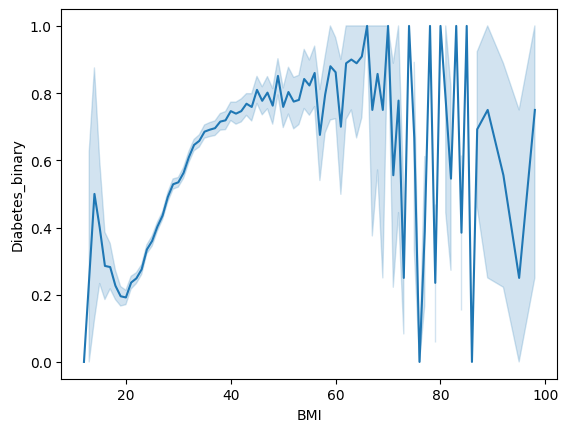

In [10]:
sns.lineplot(x='BMI', y='Diabetes_binary', data=data)
plt.show()

<Axes: title={'center': 'Correlation with the Diabetes Prediction'}>

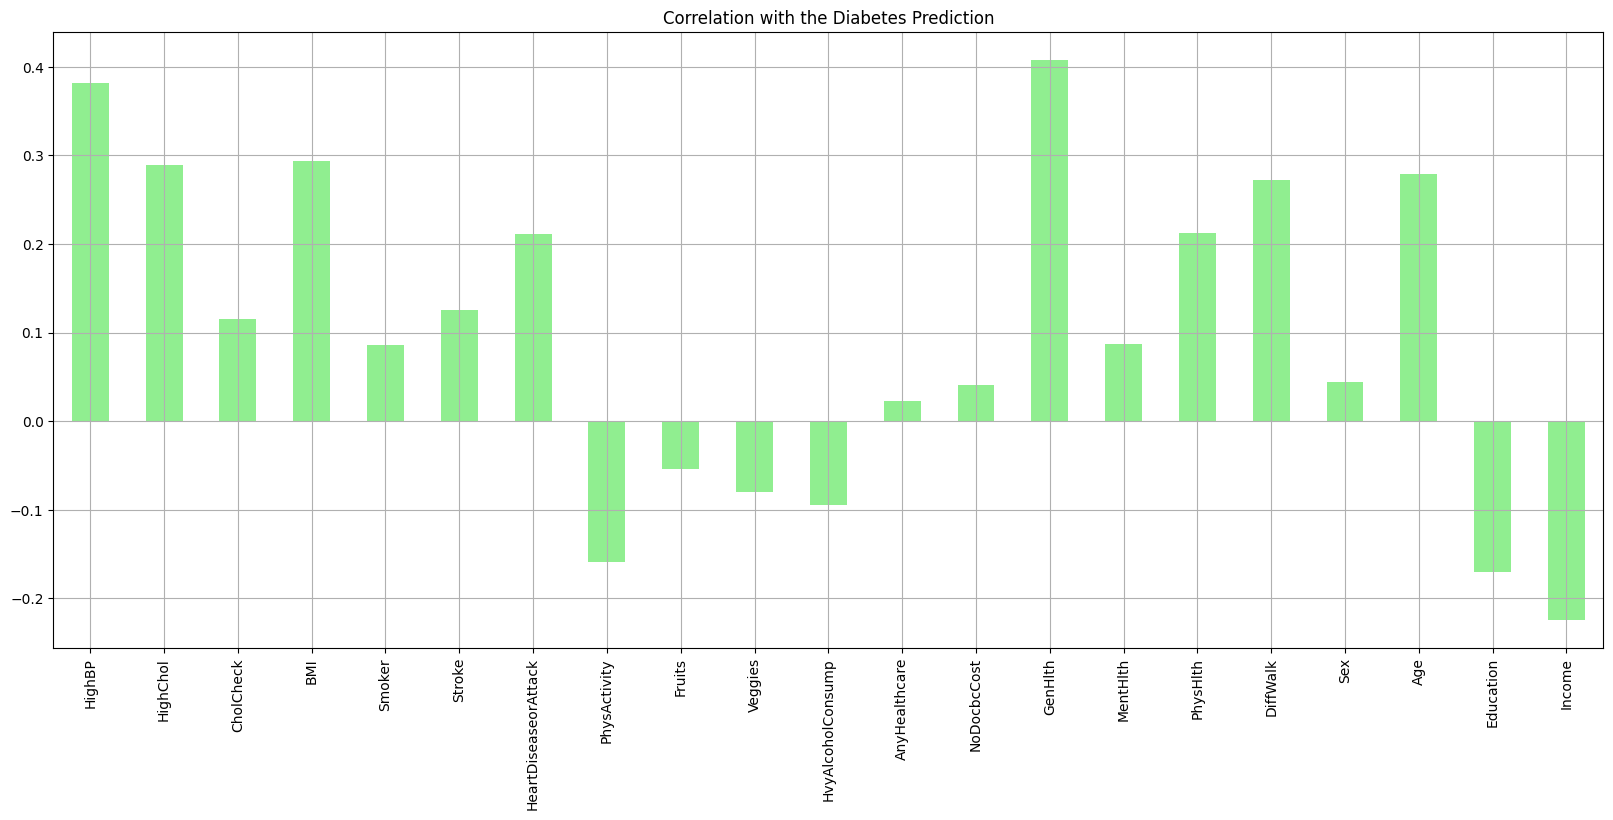

In [11]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20,8), title="Correlation with the Diabetes Prediction", color='lightgreen')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

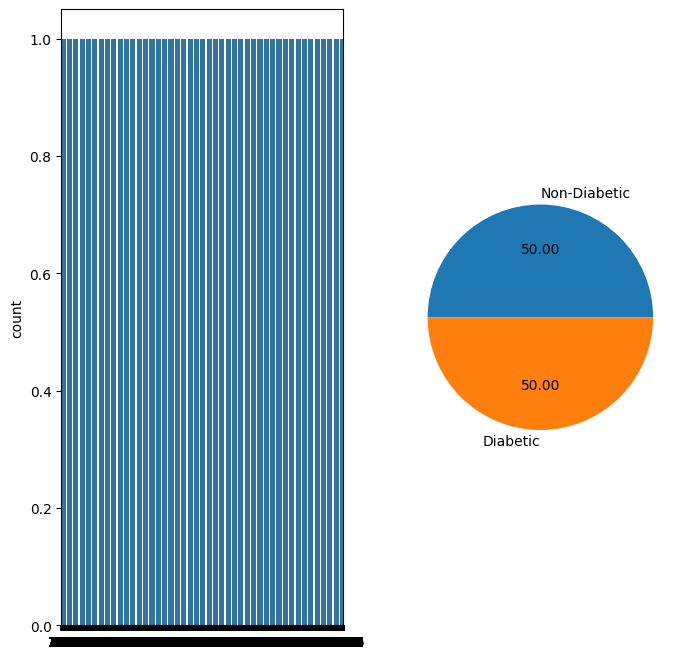

In [13]:
figure1, plot1 = plt.subplots(1, 2, figsize=(8, 8))

# Count plot
sns.countplot(data['Diabetes_binary'], ax=plot1[0])

# Pie chart
labels = ["Non-Diabetic", "Diabetic"]
plot1[1].pie(data["Diabetes_binary"].value_counts(), labels=labels, autopct="%.02f")

plt.show()


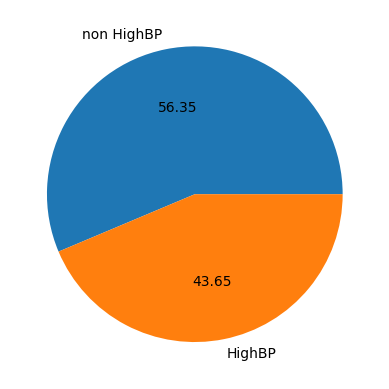

In [16]:
labels=["non HighBP","HighBP"]

plt.pie(data["HighBP"].value_counts() , labels =labels , autopct='%.02f' );

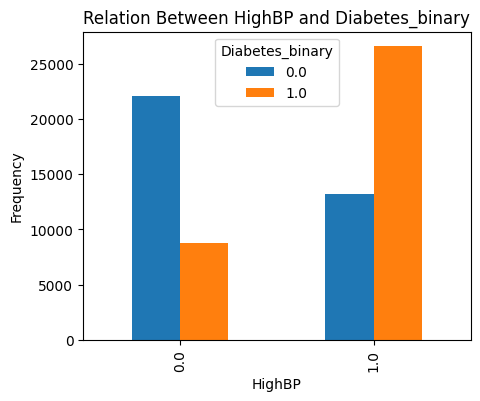

In [17]:
pd.crosstab(data.HighBP, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between HighBP and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

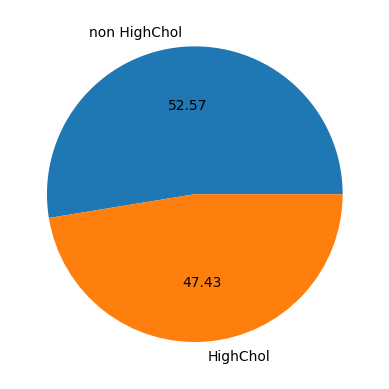

In [18]:
labels=["non HighChol", "HighChol"]

plt.pie(data["HighChol"].value_counts() , labels=labels, autopct='%.02f' );

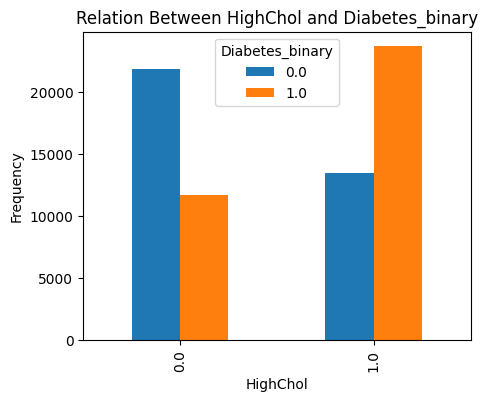

In [19]:
pd.crosstab(data.HighChol, data.Diabetes_binary).plot(kind="bar", figsize=(5,4))

plt.title('Relation Between HighChol and Diabetes_binary')
plt.xlabel('HighChol')
plt.ylabel('Frequency')
plt.show()

In [20]:
(data.groupby(["HighBP","HighChol"])["Diabetes_binary"].value_counts()/data.groupby(["HighBP", "HighChol"])["Diabetes_binary"].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                78.843295
                  1.0                21.156705
        1.0       0.0                58.125819
                  1.0                41.874181
1.0     0.0       1.0                55.359149
                  0.0                44.640851
        1.0       1.0                72.553907
                  0.0                27.446093
dtype: float64

Text(0.5, 1.0, 'Relation between HighBP, HighChol and Diabetes')

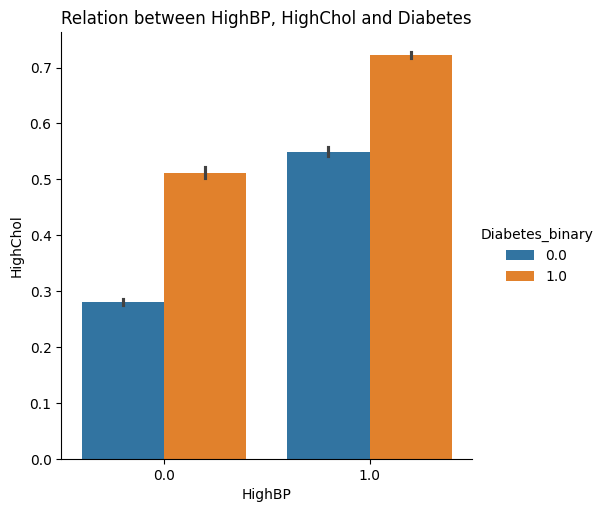

In [21]:
sns.catplot(x="HighBP", y="HighChol" , data=data , hue="Diabetes_binary", kind="bar");
plt.title("Relation between HighBP, HighChol and Diabetes")

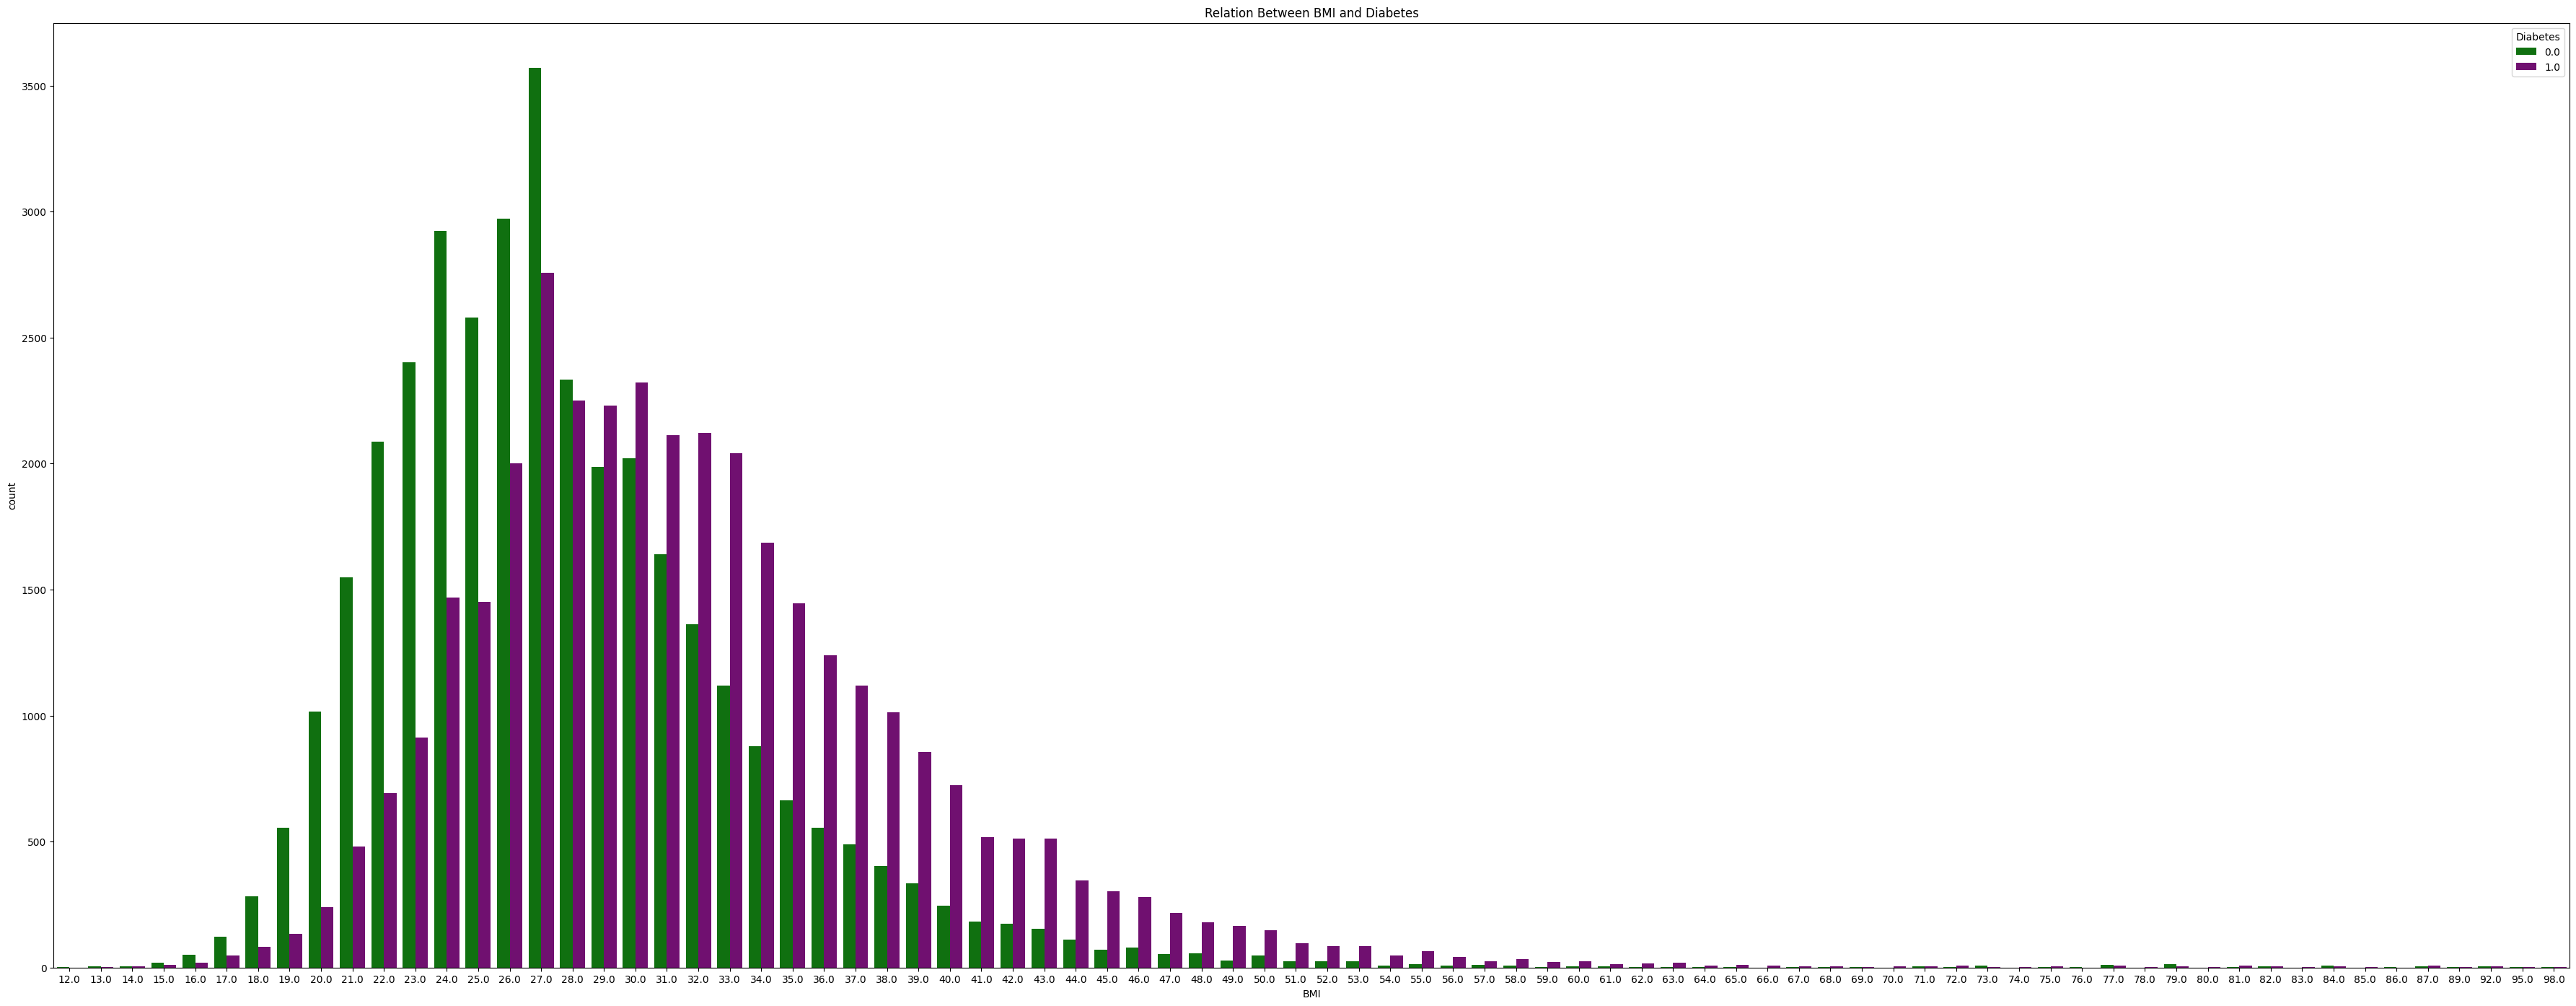

In [5]:
plt.figure(figsize=(45,17))
warnings.filterwarnings('ignore')

sns.countplot(x='BMI', hue='Diabetes_binary', data=data, palette={0: "green", 1: "purple"})
plt.title("Relation Between BMI and Diabetes")

plt.legend(title='Diabetes')
plt.show()

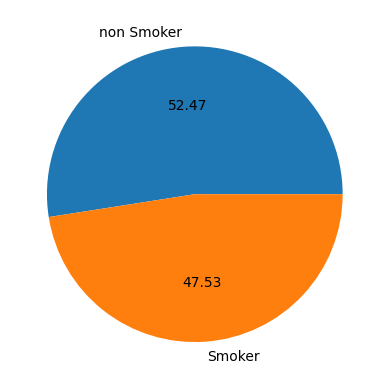

In [14]:
labels =["non Smoker","Smoker"]
plt.pie(data["Smoker"].value_counts(), labels=labels, autopct='%.02f' );

In [15]:
pd.crosstab(data.Smoker,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,20065,17029
1.0,15281,18317


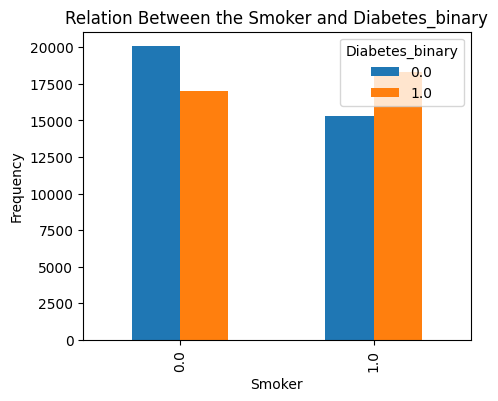

In [16]:
pd.crosstab(data.Smoker, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between the Smoker and Diabetes_binary')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

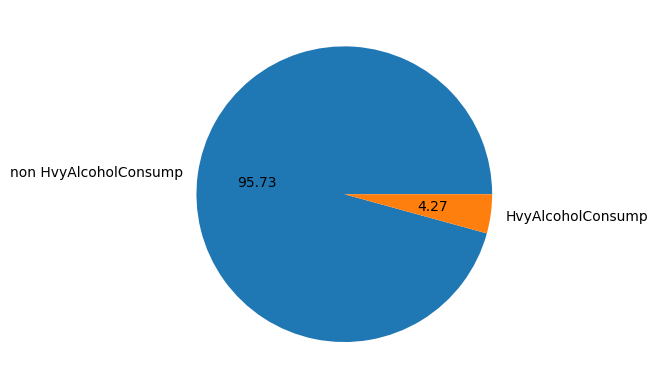

In [17]:
labels=["non HvyAlcoholConsump", "HvyAlcoholConsump"]

plt.pie(data["HvyAlcoholConsump"].value_counts(), labels=labels, autopct='%.02f' );

In [18]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,33158,34514
1.0,2188,832


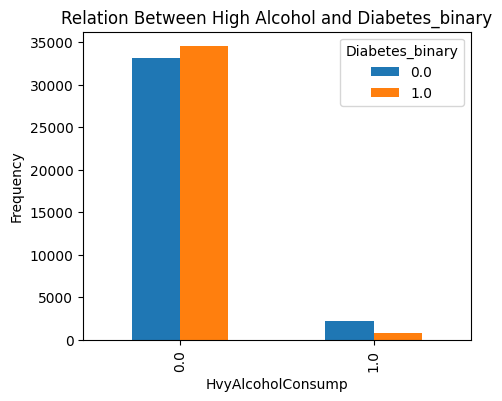

In [19]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between High Alcohol and Diabetes_binary')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Frequency')
plt.show()

In [20]:
(data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                53.373076
                           1.0                46.626924
        1.0                0.0                79.300292
                           1.0                20.699708
1.0     0.0                1.0                55.993925
                           0.0                44.006075
        1.0                0.0                68.910095
                           1.0                31.089905
dtype: float64

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

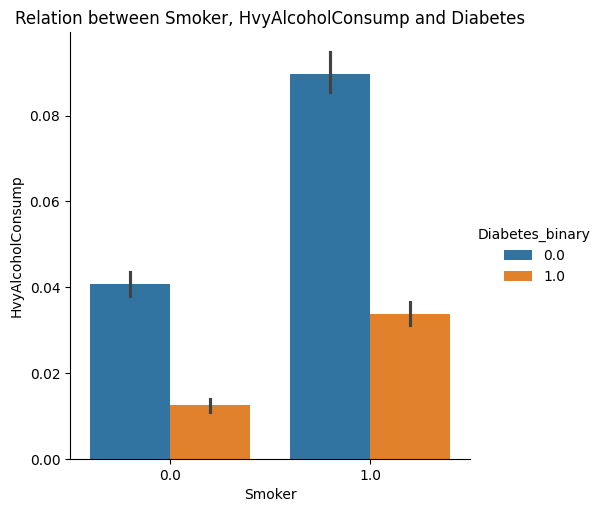

In [21]:
sns.catplot(x="Smoker", y="HvyAlcoholConsump" , data=data , hue="Diabetes_binary", kind="bar");
plt.title("Relation between Smoker, HvyAlcoholConsump and Diabetes")

In [23]:
(data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100

Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                55.340444
                              1.0                44.659556
        1.0                   1.0                73.904807
                              0.0                26.095193
1.0     0.0                   1.0                68.227425
                              0.0                31.772575
        1.0                   1.0                81.677484
                              0.0                18.322516
dtype: float64

Text(0.5, 1.0, 'Relation between Stroke, HeartDiseaseorAttack and Diabetes')

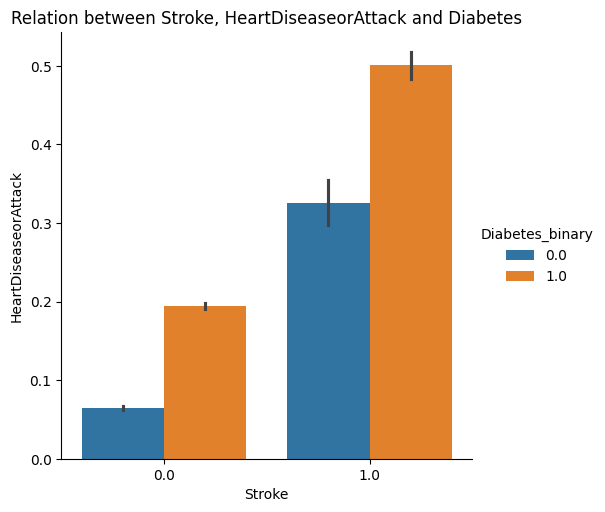

In [24]:
sns.catplot(x="Stroke", y="HeartDiseaseorAttack" , data=data , hue="Diabetes_binary", kind="bar");
plt.title("Relation between Stroke, HeartDiseaseorAttack and Diabetes")

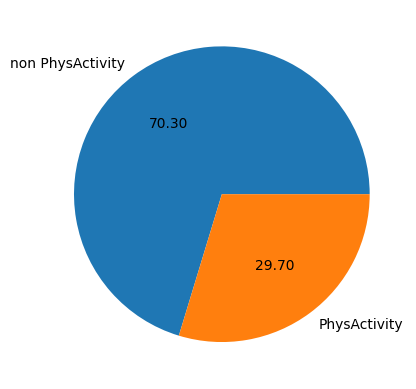

In [25]:
labels = ["non PhysActivity","PhysActivity"]

plt.pie(data["PhysActivity"].value_counts(), labels=labels, autopct='%.02f' );

In [26]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,7934,13059
1.0,27412,22287


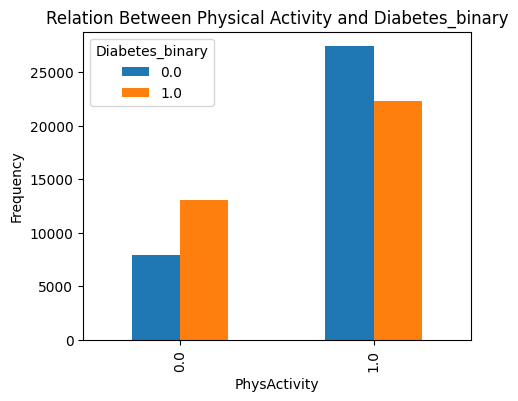

In [27]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between Physical Activity and Diabetes_binary')
plt.xlabel('PhysActivity')
plt.ylabel('Frequency')
plt.show()

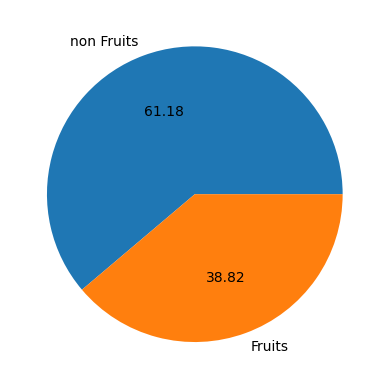

In [28]:
labels = ["non Fruits","Fruits"]

plt.pie(data["Fruits"].value_counts(), labels=labels, autopct='%.02f' );

In [29]:
pd.crosstab(data.Fruits, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,12790,14653
1.0,22556,20693


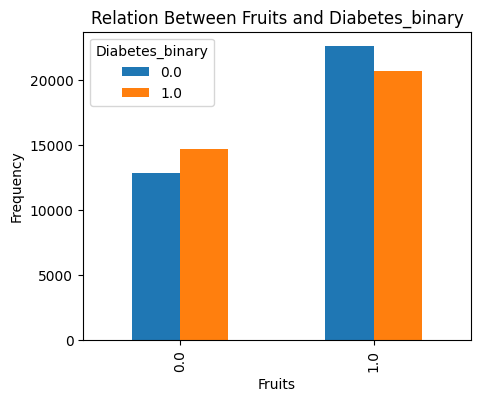

In [30]:
pd.crosstab(data.Fruits, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between Fruits and Diabetes_binary')
plt.xlabel('Fruits')
plt.ylabel('Frequency')
plt.show()

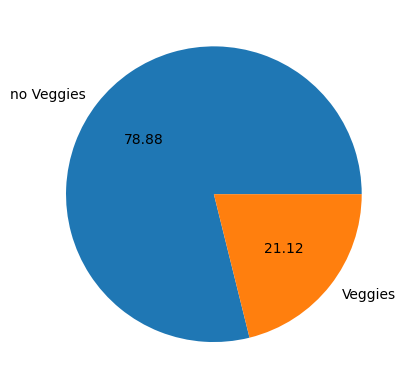

In [31]:
labels = ["no Veggies","Veggies"]

plt.pie(data["Veggies"].value_counts(), labels=labels, autopct='%.02f' );

In [32]:
pd.crosstab(data.Veggies, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Veggies,,
0.0,6322,8610
1.0,29024,26736


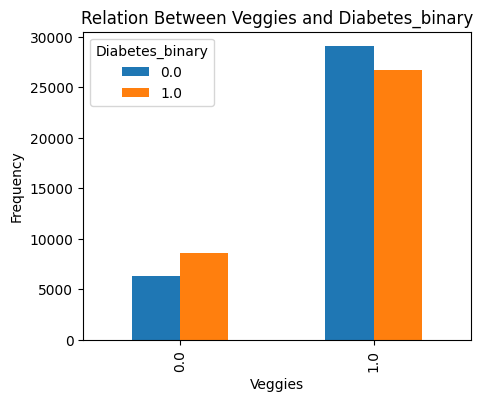

In [33]:
pd.crosstab(data.Veggies, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation Between Veggies and Diabetes_binary')
plt.xlabel('Veggies')
plt.ylabel('Frequency')
plt.show()

In [34]:
pd.crosstab(data.GenHlth, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
GenHlth,,
1.0,7142,1140
2.0,13491,6381
3.0,9970,13457
4.0,3513,9790
5.0,1230,4578


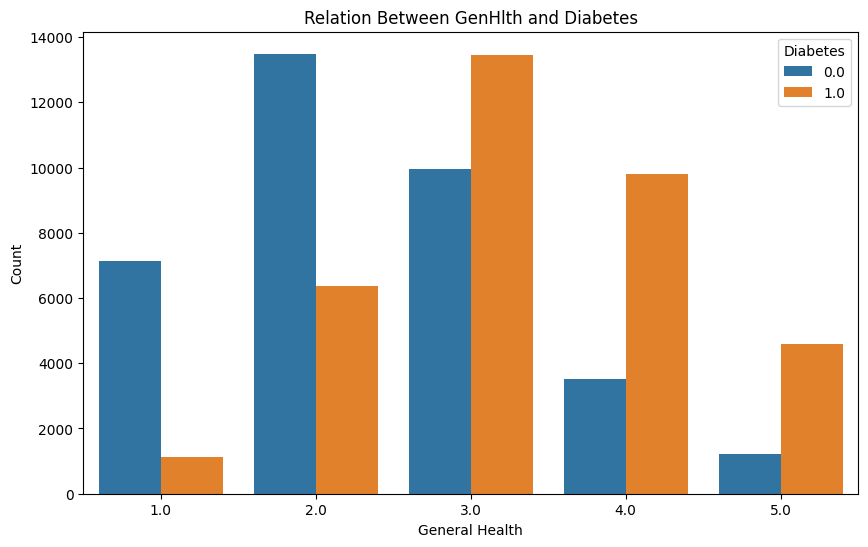

In [38]:
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
warnings.filterwarnings('ignore')

sns.countplot(x="GenHlth", data=data, hue="Diabetes_binary")
plt.title("Relation Between GenHlth and Diabetes")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.legend(title='Diabetes')
plt.show()

In [45]:
pd.crosstab(data.Diabetes_binary,data.MentHlth)

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,24688,1239,1759,1043,492,1296,124,420,88,15,...,36,11,5,4,152,10,5,42,23,1552
1.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


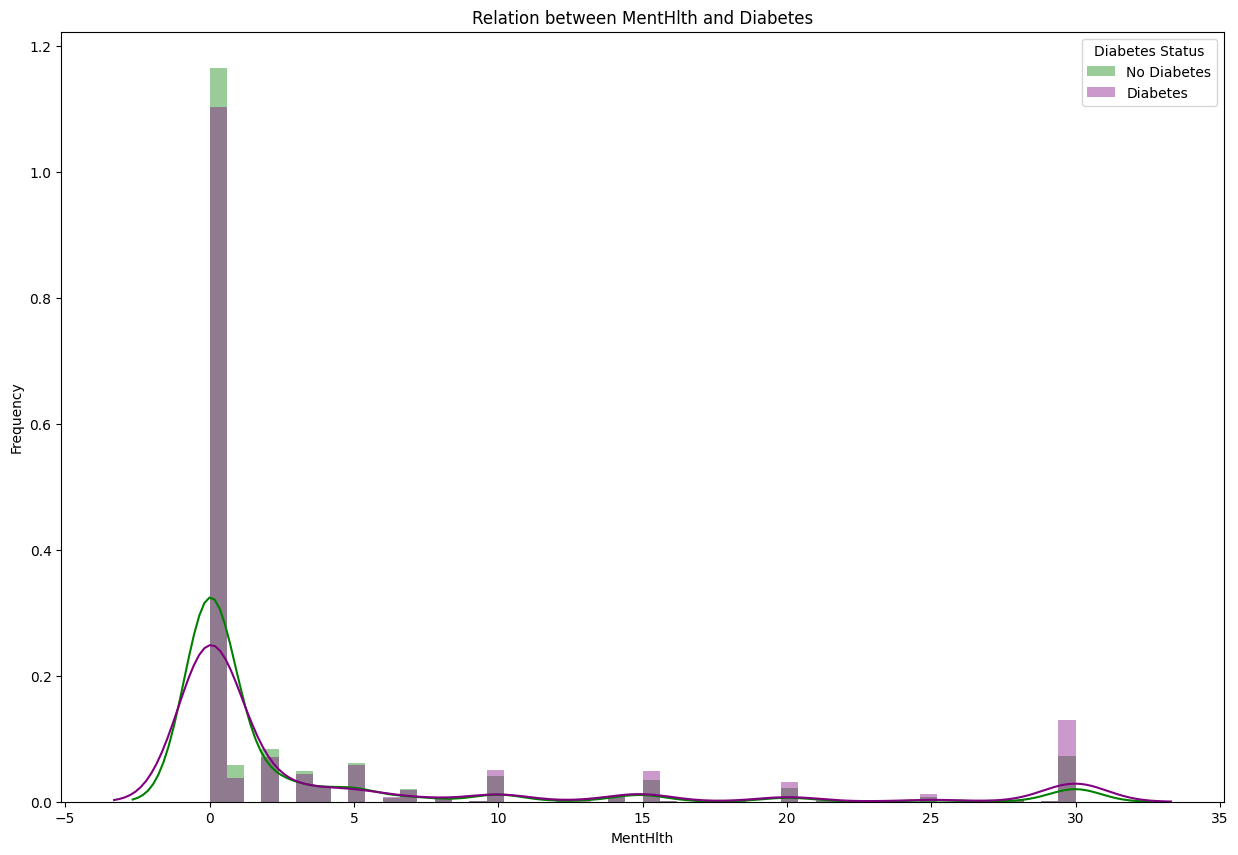

In [51]:
plt.figure(figsize=(15,10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_binary == 0], color="green", label="No Diabetes", kde=True)
sns.distplot(data.MentHlth[data.Diabetes_binary == 1], color="purple", label="Diabetes", kde=True)

plt.title("Relation between MentHlth and Diabetes")
plt.xlabel("MentHlth")
plt.ylabel("Frequency")
plt.legend(title="Diabetes Status")

plt.show()

In [52]:
pd.crosstab(data.Diabetes_binary,data.PhysHlth)

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,23175,1665,2074,1149,613,1018,165,583,117,19,...,90,8,11,9,163,4,13,68,21,2227
1.0,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


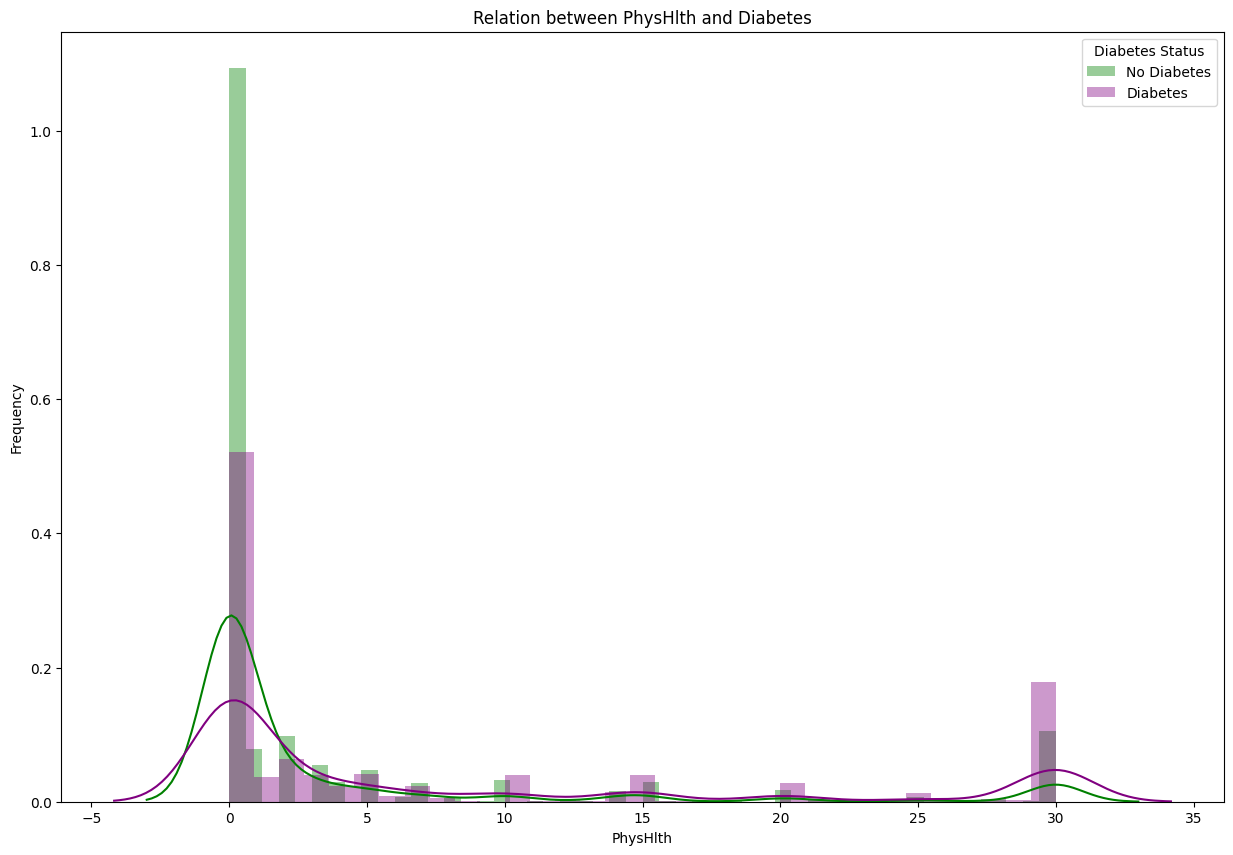

In [53]:
plt.figure(figsize=(15,10))
warnings.filterwarnings('ignore')

sns.distplot(data.PhysHlth[data.Diabetes_binary == 0], color="green", label="No Diabetes", kde=True)
sns.distplot(data.PhysHlth[data.Diabetes_binary == 1], color="purple", label="Diabetes", kde=True)

plt.title("Relation between PhysHlth and Diabetes")
plt.xlabel("PhysHlth")
plt.ylabel("Frequency")
plt.legend(title="Diabetes Status")

plt.show()